In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv("accions.csv")

In [10]:
# Read the CSVs
accions_df = pd.read_csv("accions.csv", parse_dates=["Data"])
tramits_df = pd.read_csv("tramits.csv")

In [11]:
# 1. Create a time series visualization of tramit activity
def create_tramit_activity_visualization(accions_df):
    # Resample by day and count actions
    daily_counts = accions_df.set_index("Data").resample("D")["Tramit"].count()

    plt.figure(figsize=(15, 6))
    plt.plot(daily_counts.index, daily_counts.values)
    plt.title("Daily Tramit Activity Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Actions")
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    return plt


# 2. Create a heatmap of activity by hour and day of week
def create_activity_heatmap(accions_df):
    accions_df["Hour"] = accions_df["Data"].dt.hour
    accions_df["DayOfWeek"] = accions_df["Data"].dt.day_name()

    activity_pivot = pd.crosstab(accions_df["Hour"], accions_df["DayOfWeek"])

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        activity_pivot,
        cmap="YlOrRd",
        annot=True,
        fmt="d",
        cbar_kws={"label": "Number of Actions"},
    )
    plt.title("Activity Heatmap by Hour and Day of Week")
    return plt


# 3. Create a bar chart of most common tramits
def create_top_tramits_chart(accions_df, tramits_df, top_n=10):
    # Merge to get tramit titles
    merged_df = accions_df.merge(tramits_df, left_on="Tramit", right_on="Id")
    tramit_counts = merged_df["Titol"].value_counts().head(top_n)

    plt.figure(figsize=(15, 6))
    tramit_counts.plot(kind="bar")
    plt.title(f"Top {top_n} Most Common Tramits")
    plt.xlabel("Tramit Title")
    plt.ylabel("Number of Actions")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    return plt


# 4. Create a pie chart of action types
def create_action_type_pie(accions_df):
    action_counts = accions_df["Accio"].value_counts()

    plt.figure(figsize=(10, 10))
    plt.pie(action_counts.values, labels=action_counts.index, autopct="%1.1f%%")
    plt.title("Distribution of Action Types")
    return plt


# Create all visualizations in a single figure
def create_dashboard():
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Tramits Analysis Dashboard", fontsize=16)

    # Time series plot
    plt.subplot(2, 2, 1)
    create_tramit_activity_visualization(accions_df)

    # Heatmap
    plt.subplot(2, 2, 2)
    create_activity_heatmap(accions_df)

    # Top tramits
    plt.subplot(2, 2, 3)
    create_top_tramits_chart(accions_df, tramits_df)

    # Action types
    plt.subplot(2, 2, 4)
    create_action_type_pie(accions_df)

    plt.tight_layout()
    return plt

C:\Users\Joel Taylor\AppData\Local\Temp\ipykernel_11012\2418186312.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


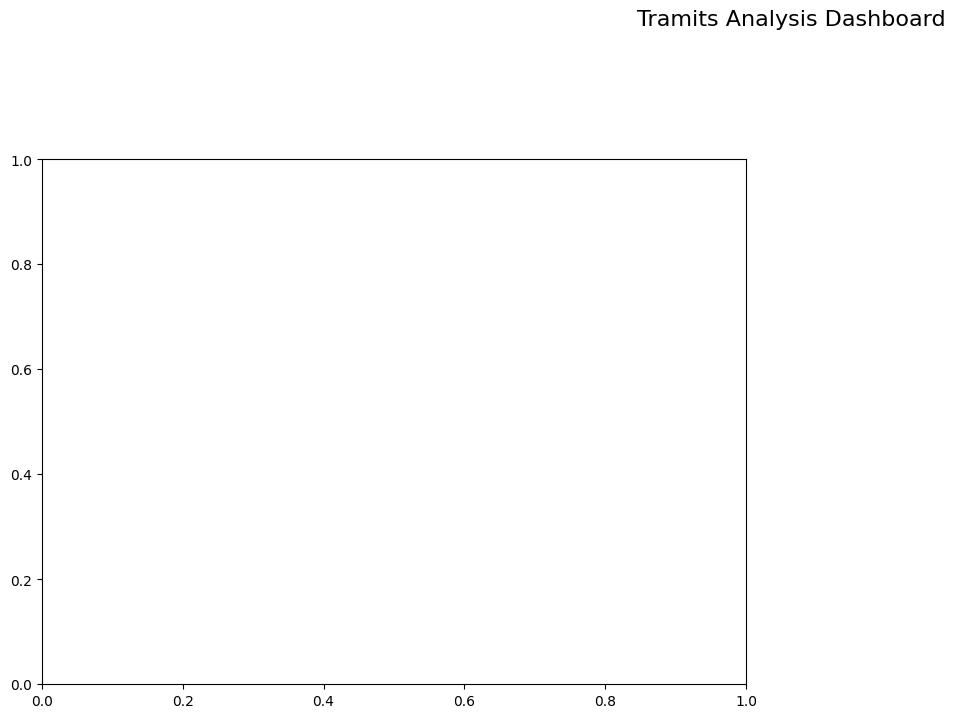

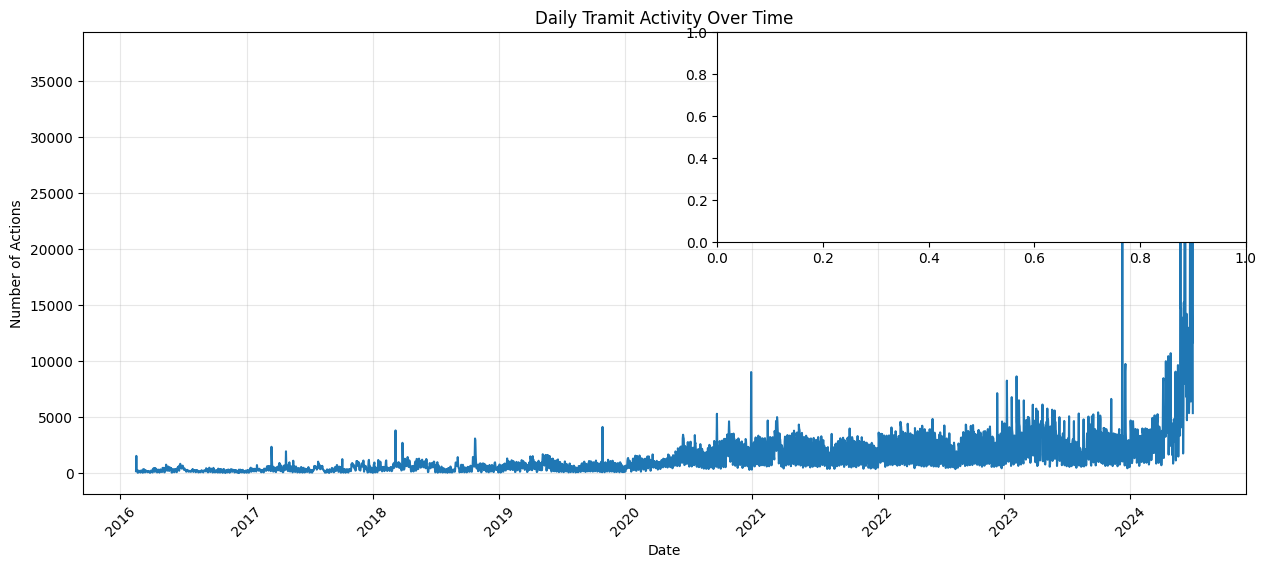

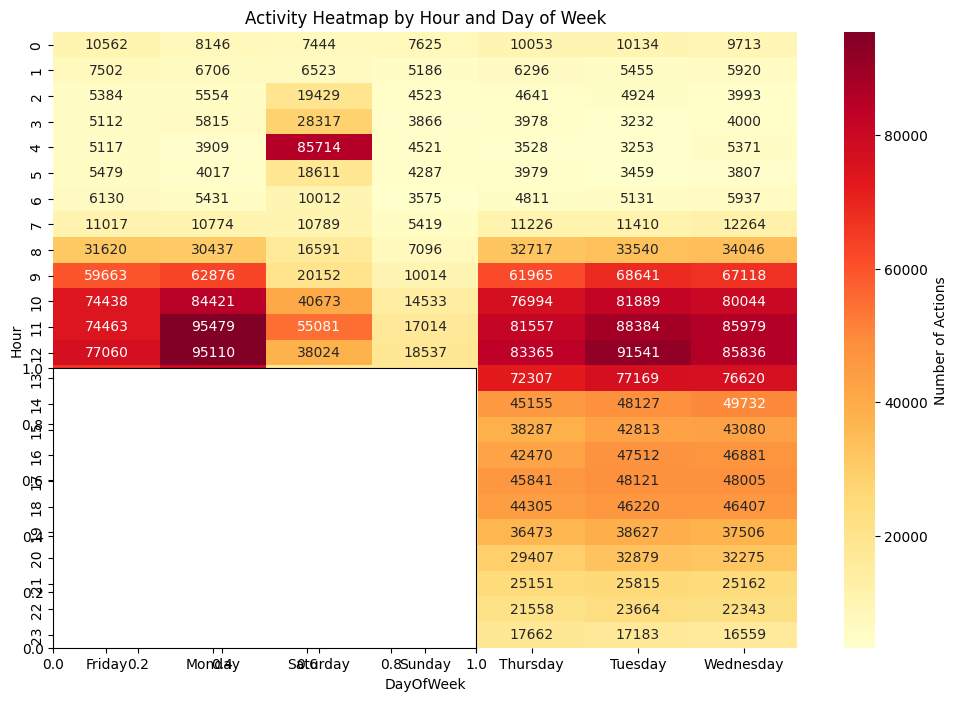

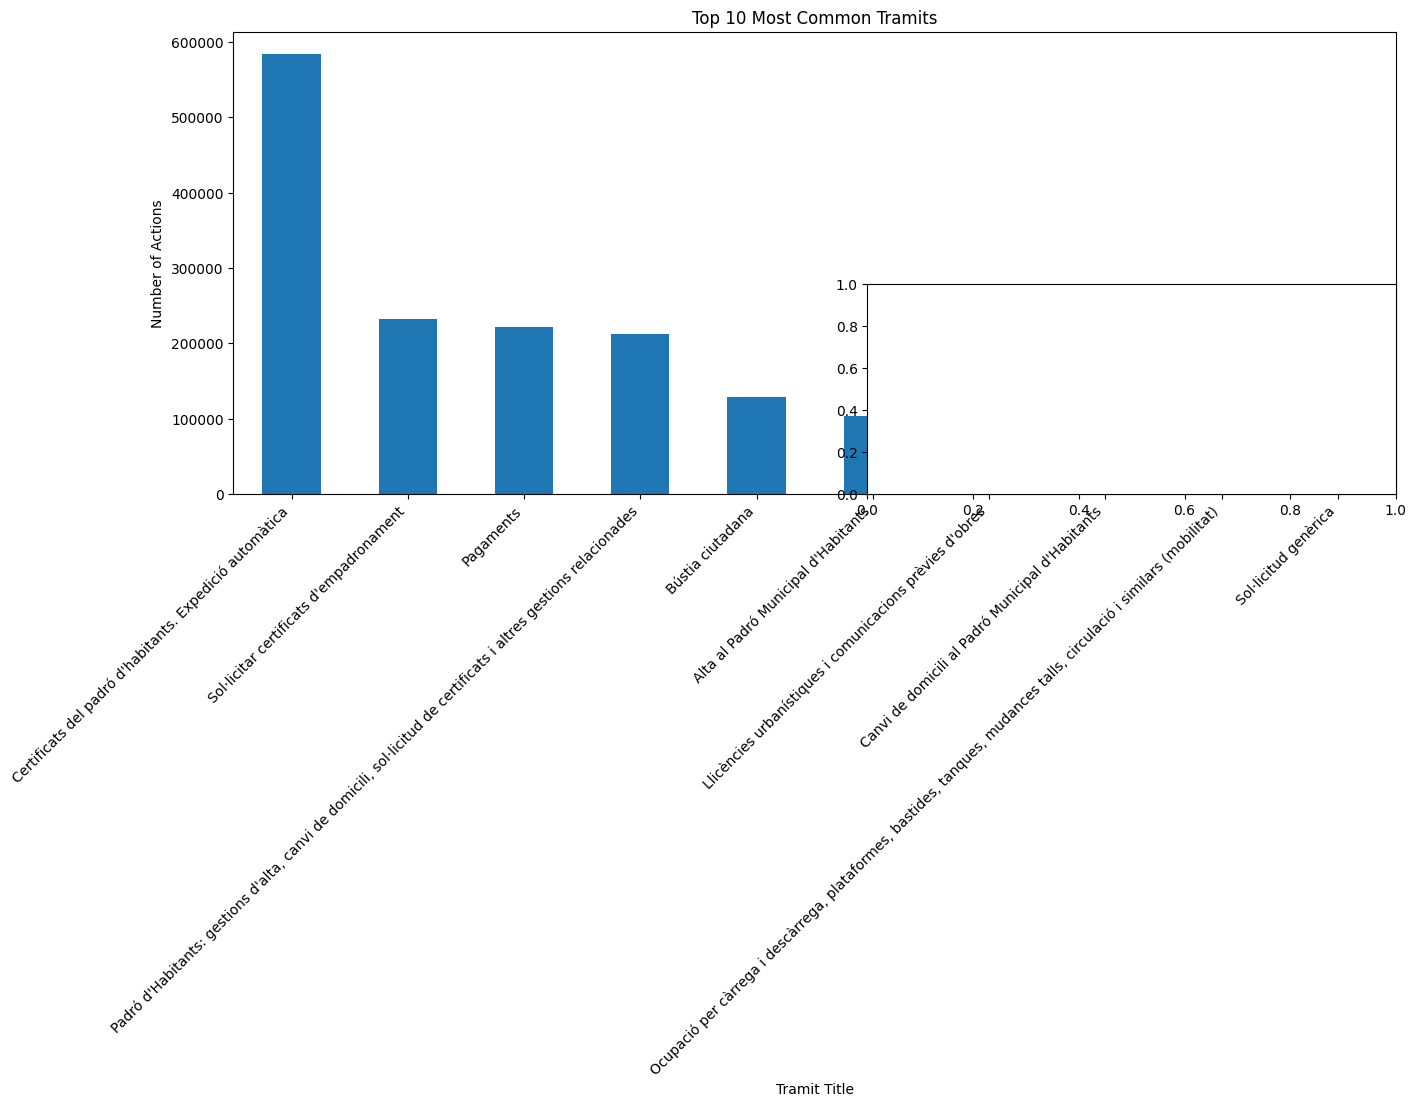

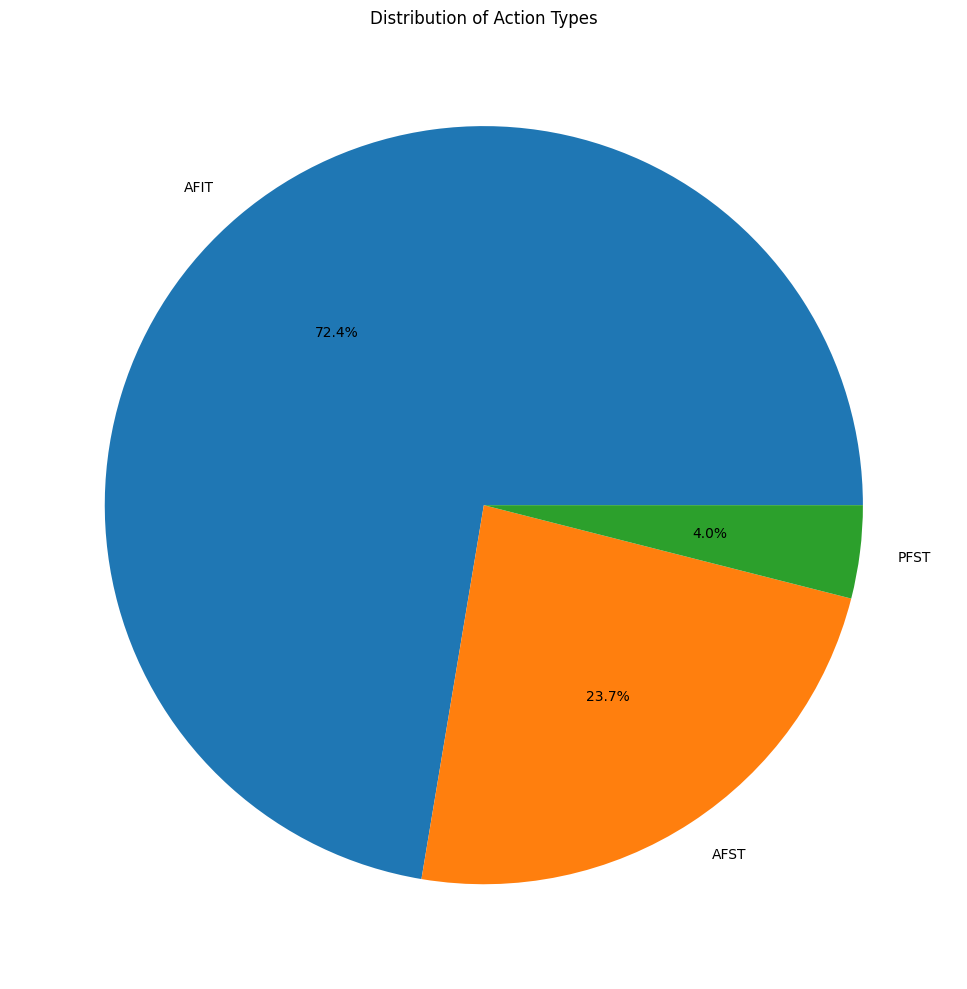

In [14]:
# Create and display the dashboard
dashboard = create_dashboard()
plt.show()